In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1=pd.read_csv(r"C:\Users\AISHWARYA\Downloads\Nov-2021.csv", encoding='latin-1')
data1.T.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
KARNATAKA STATE ROAD TRANSPORT CORPORATION,DIVISIONWISE OPERATIONAL RESULTS FOR THE MONTH...,NaN,NaN,Sl.No.,NaN,1,NaN,2,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 1,NaN,NaN,NaN,Factor,Physical performance,Schedules,(As on last day),Fleet Held,(As on last day),Fleet Utilisation (%),...,MDY,CJR,HSN,CKM,MNG,PTR,DVG,SMG,CDG,KBS
Unnamed: 2,NaN,NaN,NaN,BNG©,NaN,570,NaN,743,NaN,67.4,...,Mandya,Chamarajanagar,Hassan,Chikkamagaluru,Mangaluru,Puttur,Davanagere,Shivamoga,Chitradurga,Kempegowda Bus Station is a Division with just...
Unnamed: 3,NaN,NaN,NaN,RMN,NaN,469,NaN,498,NaN,80.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,TMK,NaN,574,NaN,619,NaN,86.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
D1=data1.T
D1.columns=D1.iloc[1]
D1=D1[2:]
D1
col_to_keep=['Schedules','Fleet Held (As on last day)','Fleet Utilisation (%)','% off road  vehicles','Schedule kms (in lakh)', 'Effective Kilometers (in lakh)']
D1.drop(columns=[col for col in D1.columns if col not in col_to_keep],inplace=True)
#remove empty rows
D1.dropna(inplace=True)
D1
#adding a new column as city id
D1['City_Id'] = range(1, len(D1) + 1)
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')

In [4]:
print(D1.columns)

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id'],
      dtype='object', name='Unnamed: 1')


In [5]:
#Effective passenger density
#effPassDensity=(('Fleet Utilisation(%)')*0.01)*('Fleet Held')
D1['Fleet Utilisation (%)'] = pd.to_numeric(D1['Fleet Utilisation (%)'], errors='coerce')
D1['Schedules'] = pd.to_numeric(D1['Schedules'], errors='coerce')


FleetUtilisation=D1['Fleet Utilisation (%)']*0.01
FleetHeldArray=D1['Schedules']
EffPassDensity=np.multiply(FleetUtilisation, FleetHeldArray)
D1['EffPassDensity']=EffPassDensity

In [6]:
D1.info

<bound method DataFrame.info of Unnamed: 1   Schedules  Fleet Utilisation (%) % off road  vehicles  \
Unnamed: 2         570                   67.4                  6.2   
Unnamed: 3         469                   80.4                  4.9   
Unnamed: 4         574                   86.2                  4.8   
Unnamed: 5         516                   85.2                  2.4   
Unnamed: 6         514                   87.6                  2.9   
Unnamed: 7         372                   77.3                  3.9   
Unnamed: 8         622                   82.7                  4.2   
Unnamed: 9         414                   79.9                  7.2   
Unnamed: 10        448                   88.5                  5.3   
Unnamed: 11        499                   90.6                  7.5   
Unnamed: 12        477                   92.8                  3.8   
Unnamed: 13        475                   78.1                  5.5   
Unnamed: 14        479                   83.0             

In [8]:
D1.head()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.4,6.2,60.35,65.31,1,384.180
Unnamed: 3,469,80.4,4.9,38.99,39.71,2,377.076
Unnamed: 4,574,86.2,4.8,57.22,54,3,494.788
Unnamed: 5,516,85.2,2.4,44,46.59,4,439.632
Unnamed: 6,514,87.6,2.9,47.64,51.25,5,450.264


In [9]:
D1.tail()

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 14,479,83.0,6.1,44.14,43.26,13,397.570
Unnamed: 15,332,94.0,3.8,33.66,34.38,14,312.080
Unnamed: 16,302,80.7,4,30.67,32.76,15,243.714
Unnamed: 17,261,86.3,6.5,26.45,27.12,16,225.243
Unnamed: 19,7324,83.2,4.9,686.1,710.9,17,6093.568


In [10]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Unnamed: 2 to Unnamed: 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Schedules                       17 non-null     int64  
 1   Fleet Utilisation (%)           17 non-null     float64
 2   % off road  vehicles            17 non-null     object 
 3   Schedule kms (in lakh)          17 non-null     object 
 4   Effective Kilometers (in lakh)  17 non-null     object 
 5   City_Id                         17 non-null     int64  
 6   EffPassDensity                  17 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ KB


In [11]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.4,6.2,60.35,65.31,1,384.180
Unnamed: 3,469,80.4,4.9,38.99,39.71,2,377.076
Unnamed: 4,574,86.2,4.8,57.22,54,3,494.788
Unnamed: 5,516,85.2,2.4,44,46.59,4,439.632
Unnamed: 6,514,87.6,2.9,47.64,51.25,5,450.264
Unnamed: 7,372,77.3,3.9,18.81,19.42,6,287.556
Unnamed: 8,622,82.7,4.2,61.35,64.93,7,514.394
Unnamed: 9,414,79.9,7.2,35.42,36.49,8,330.786
Unnamed: 10,448,88.5,5.3,41.39,44.74,9,396.480
Unnamed: 11,499,90.6,7.5,47.7,49.75,10,452.094


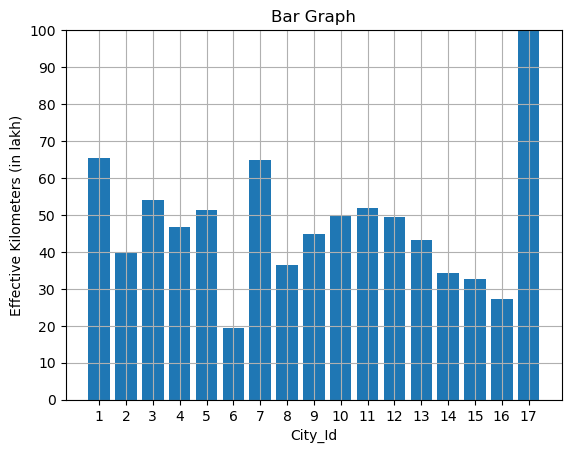

In [31]:
X=D1['City_Id']
Y=D1['Effective Kilometers (in lakh)']
plt.bar(X,Y)
plt.title("Bar Graph")
plt.xlabel('City_Id')
plt.ylabel('Effective Kilometers (in lakh)')
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 100)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 101, 10))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()

In [13]:
import scipy
print(scipy.__version__)

1.10.1


In [14]:
X=D1['City_Id']
Y=D1['Schedules']
'''
plt.bar(X,Y)
plt.xlabel('City ID')
plt.ylabel('Schedules')% of road vehicles
plt.xticks(X)  # Set x-axis ticks to match city IDs
# Set y-axis range with a step of 10
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10
plt.grid(True)
plt.show()
'''

"\nplt.bar(X,Y)\nplt.xlabel('City ID')\nplt.ylabel('Schedules')% of road vehicles\nplt.xticks(X)  # Set x-axis ticks to match city IDs\n# Set y-axis range with a step of 10\nplt.ylim(0, 1000)  # Set the y-axis range from 0 to 100\nplt.yticks(range(0, 1001, 50))  # Set y-axis ticks with a step of 10\nplt.grid(True)\nplt.show()\n"

In [15]:
D1

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
Unnamed: 2,570,67.4,6.2,60.35,65.31,1,384.180
Unnamed: 3,469,80.4,4.9,38.99,39.71,2,377.076
Unnamed: 4,574,86.2,4.8,57.22,54,3,494.788
Unnamed: 5,516,85.2,2.4,44,46.59,4,439.632
Unnamed: 6,514,87.6,2.9,47.64,51.25,5,450.264
Unnamed: 7,372,77.3,3.9,18.81,19.42,6,287.556
Unnamed: 8,622,82.7,4.2,61.35,64.93,7,514.394
Unnamed: 9,414,79.9,7.2,35.42,36.49,8,330.786
Unnamed: 10,448,88.5,5.3,41.39,44.74,9,396.480
Unnamed: 11,499,90.6,7.5,47.7,49.75,10,452.094


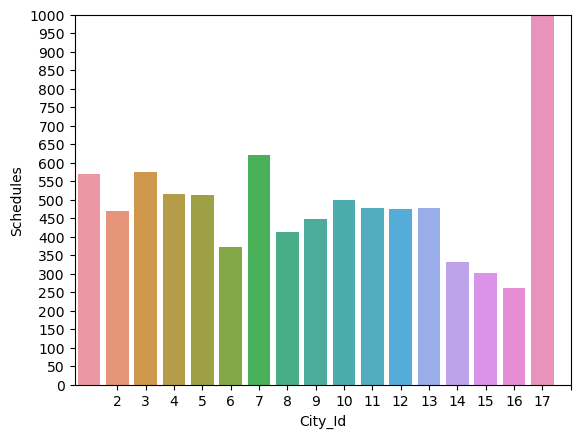

In [16]:
sns.barplot(x=X,y=Y,orient='v')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(0, 1001, 50))
plt.show()

In [17]:
meanEPD=np.mean(D1['Schedules'])
print('Mean of Schedules:',meanEPD)

D1['Schedules'].values

Mean of Schedules: 861.6470588235294


array([ 570,  469,  574,  516,  514,  372,  622,  414,  448,  499,  477,
        475,  479,  332,  302,  261, 7324], dtype=int64)

In [18]:
std_by_city = D1['Schedules'].std()
variance=std_by_city**2
print('variance:',variance)
print('Standard deviation:',std_by_city)

variance: 2782679.4926470583
Standard deviation: 1668.1365329753612


In [19]:
#calculate the (X-mean) for each city and it as a column
XdiffMean=D1['Schedules'][:15].values-meanEPD


NewD1={
    'City Id':D1['City_Id'][:15].values,
    'Schedules':D1['Schedules'][:15].values,
    'Mean Variations':XdiffMean
}
NewD1=pd.DataFrame(NewD1)
NewD1

,City Id,Schedules,Mean Variations
0,1,570,-291.647059
1,2,469,-392.647059
2,3,574,-287.647059
3,4,516,-345.647059
4,5,514,-347.647059
5,6,372,-489.647059
6,7,622,-239.647059
7,8,414,-447.647059
8,9,448,-413.647059
9,10,499,-362.647059


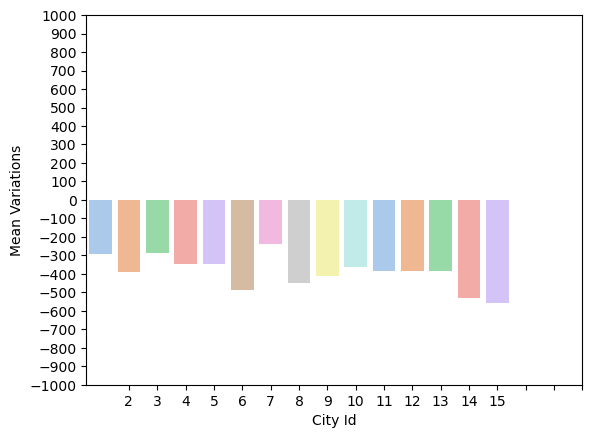

In [20]:
sns.barplot(x=NewD1['City Id'],y=NewD1['Mean Variations'],palette='pastel')
plt.xticks(X)
plt.ylim(0, 1000)  # Set the y-axis range from 0 to 100
plt.yticks(range(-1000, 1001, 100))
plt.show()

C:\Users\AISHWARYA\AppData\Local\Temp\ipykernel_20164\2940990524.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=D1['Schedules'], shade=True)


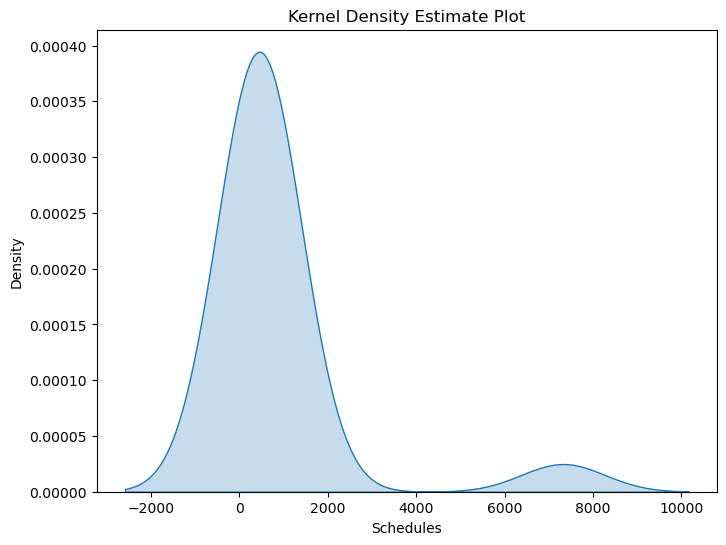

In [21]:
import statistics as stats
from scipy.stats import norm 
dfmean = np.mean(D1['Schedules'])
sd = np.std(D1['Schedules'])

plt.figure(figsize=(8, 6))
sns.kdeplot(data=D1['Schedules'], shade=True)
plt.xlabel('Schedules')
plt.ylabel('Density')
plt.title('Kernel Density Estimate Plot')
plt.show()

In [22]:
Stats = D1.describe(include='all')
cols = Stats.index.tolist()
Stats

Unnamed: 1,Schedules,Fleet Utilisation (%),% off road vehicles,Schedule kms (in lakh),Effective Kilometers (in lakh),City_Id,EffPassDensity
count,17.000000,17.000000,17,17,17,17.000000,17.000000
unique,NaN,NaN,15,17,17,NaN,NaN
top,NaN,NaN,4.9,60.35,65.31,NaN,NaN
freq,NaN,NaN,2,1,1,NaN,NaN
mean,861.647059,83.758824,NaN,NaN,NaN,9.000000,718.415059
std,1668.136533,6.442249,NaN,NaN,NaN,5.049752,1387.569486
min,261.000000,67.400000,NaN,NaN,NaN,1.000000,225.243000
25%,414.000000,80.400000,NaN,NaN,NaN,5.000000,330.786000
50%,477.000000,83.200000,NaN,NaN,NaN,9.000000,396.480000
75%,516.000000,87.600000,NaN,NaN,NaN,13.000000,450.264000


In [23]:
for col in D1.columns:
    D1[col] = pd.to_numeric(D1[col], errors='coerce')


In [24]:
for j in cols:
    for i in Stats.columns:
        if j == 'mean' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].mean()
        elif j == 'std' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].std()
        elif j == 'min' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].min()
        elif j == 'max' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].max()
        elif j == '25%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.25)
        elif j == '50%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.50)
        elif j == '75%' and pd.isna(Stats.loc[j, i]):
            Stats.loc[j, i] = D1[i].quantile(q=0.75)

# Display the updated Stats DataFrame
print(Stats)


Unnamed: 1    Schedules  Fleet Utilisation (%) % off road  vehicles  \
count         17.000000              17.000000                   17   
unique              NaN                    NaN                   15   
top                 NaN                    NaN                  4.9   
freq                NaN                    NaN                    2   
mean         861.647059              83.758824             4.935294   
std         1668.136533               6.442249             1.440894   
min          261.000000              67.400000                  2.4   
25%          414.000000              80.400000                  3.9   
50%          477.000000              83.200000                  4.9   
75%          516.000000              87.600000                  6.1   
max         7324.000000              94.000000                  7.5   

Unnamed: 1 Schedule kms (in lakh) Effective Kilometers (in lakh)    City_Id  \
count                          17                             17  17

<class 'numpy.int64'>


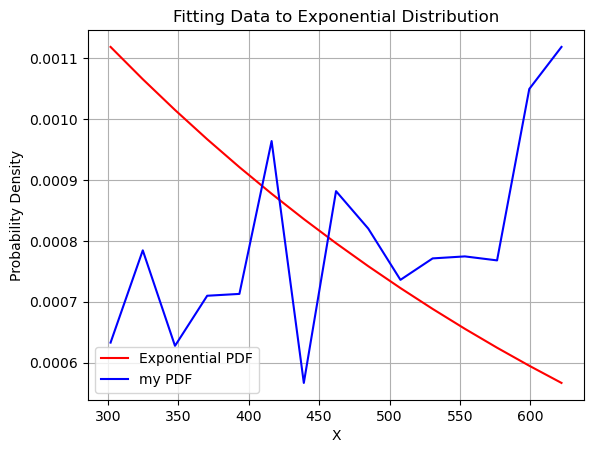

[0.0011183  0.00106531 0.00101483 0.00096675 0.00092094 0.0008773
 0.00083573 0.00079613 0.00075841 0.00072247 0.00068824 0.00065563
 0.00062456 0.00059497 0.00056678] [0.00063296 0.00078438 0.0006276  0.00070987 0.00071289 0.00096382
 0.00056678 0.00088157 0.00082016 0.00073597 0.00077117 0.00077445
 0.0007679  0.00104927 0.0011183 ]


In [25]:
from scipy.stats import expon

# Given data
data = D1['Schedules'][0:15].to_numpy()
# Calculate lambda for the exponential distribution
lambda_param = 1 / data.mean()
print(type(data[0]))
myData=data.astype('float64')


# Generate x values for the plot
x_range = np.linspace(min(data), max(data), 15)
Data=-lambda_param*x_range
myData=-lambda_param*myData
# Calculate the exponential PDF values
pdf_values = np.exp(Data)
myPdf=np.exp(myData)

pdf_values=lambda_param*pdf_values
myPdf=lambda_param*myPdf

# Plot the exponential PDF curve
plt.plot(x_range, pdf_values, color='red', label='Exponential PDF')
plt.plot(x_range, myPdf, color='blue', label='my PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Fitting Data to Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

print(pdf_values,myPdf)

In [26]:
#Left with:
'''
Correlation Analysis
Scatter Plot
Scatter heat map'''



'\nCorrelation Analysis\nScatter Plot\nScatter heat map'

In [27]:
D1.columns

Index(['Schedules', 'Fleet Utilisation (%)', '% off road  vehicles',
       'Schedule kms (in lakh)', 'Effective Kilometers (in lakh)', 'City_Id',
       'EffPassDensity'],
      dtype='object', name='Unnamed: 1')

In [28]:
D1['Schedules'].values

array([ 570,  469,  574,  516,  514,  372,  622,  414,  448,  499,  477,
        475,  479,  332,  302,  261, 7324], dtype=int64)

In [29]:
Xfactor=D1['Schedules'][:15].values
Yfactor=D1['Effective Kilometers (in lakh)'][:15].values
print(Xfactor.size,Yfactor.size)
R=scipy.stats.pearsonr(Xfactor,Yfactor)
print("Coefficient of correlation between Schedules & Effective Kilometers (in lakh):",R[0])

15 15
Coefficient of correlation between Schedules & Effective Kilometers (in lakh): 0.8739045688316731


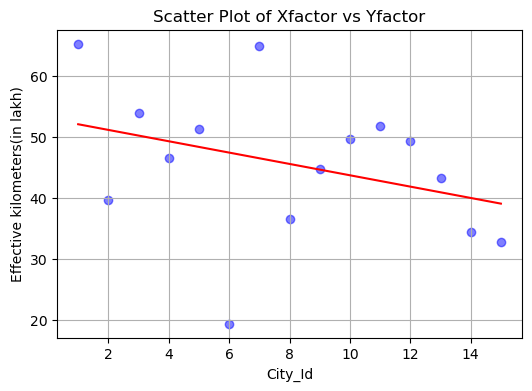

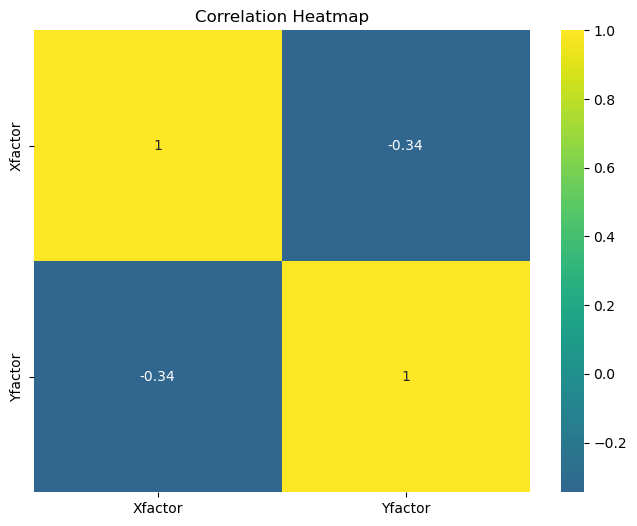

In [30]:
data = {
    'Xfactor': D1['City_Id'][:15].values,
    'Yfactor': D1['Effective Kilometers (in lakh)'][:15].values
}
Df=pd.DataFrame(data)
corrMatrix=Df.corr()
corrMatrix
Df['Xfactor'] = pd.to_numeric(Df['Xfactor'])
Df['Yfactor'] = pd.to_numeric(Df['Yfactor'])

subset_df=Df[:15]
slope, intercept = np.polyfit(subset_df['Xfactor'], subset_df['Yfactor'], 1)
regression_line = slope * subset_df['Xfactor'] + intercept

plt.figure(figsize=(6, 4))
plt.scatter(Df['Xfactor'][:15], Df['Yfactor'][:15], color='blue', alpha=0.5)
plt.plot(subset_df['Xfactor'], regression_line, color='red', label='Regression Line')
plt.xlabel('City_Id')
plt.ylabel('Effective kilometers(in lakh)')
plt.title('Scatter Plot of Xfactor vs Yfactor')
plt.grid(True)

plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='viridis', center=0,linecolor='blue')
plt.title('Correlation Heatmap')
plt.show()


